In [1]:
#Importing the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

sns.set()
plt.style.use('ggplot')
#plt.style.use('dark_background')

%matplotlib inline

In [2]:
financial_df = pd.read_csv(r"C:\Users\Uthy\OneDrive\Documents\NOTEBOOKK\Streamlit checkpoint 2\Financial_inclusion_dataset.csv")
financial_df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
#Making a copy of the dataframe in order to prevent data corruption 

df = financial_df.copy()

In [4]:
#Dropping irrelevant columns 
df.drop(columns = ["year", "uniqueid"], inplace= True)

In [5]:
#Checking for null values
df.isnull().sum()

country                   0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [6]:
df.describe()

,household_size,age_of_respondent
count,23524.000000,23524.000000
mean,3.797483,38.805220
std,2.227613,16.520569
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [7]:
#Checking for duplicated rows 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [8]:
#Checking for data types of each column 
df.dtypes

country                   object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

#### Checking for Unique values 

In [9]:
df["country"].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [10]:
df["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [11]:
df["location_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [12]:
df["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [13]:
df["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [14]:
df["relationship_with_head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

### Ydata Profiling 

In [15]:
#Importing the necessary library
from ydata_profiling import ProfileReport 

#Instantiating the library and using it to get a reportabs 
profile = ProfileReport(df, title = "Financial Report")
profile 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Encoding Categorical data

In [16]:
#Import the necessary library
from sklearn.preprocessing import LabelEncoder
#Library Instantiatio
encoder = {}
#Encoding the columns 
for columns in df.select_dtypes("object").columns:
    #Creating the key and assinging to an encoder 
    encoder[f"{columns.lower()}"] = LabelEncoder()
    df[columns] =  encoder[f"{columns.lower()}"].fit_transform(df[columns])

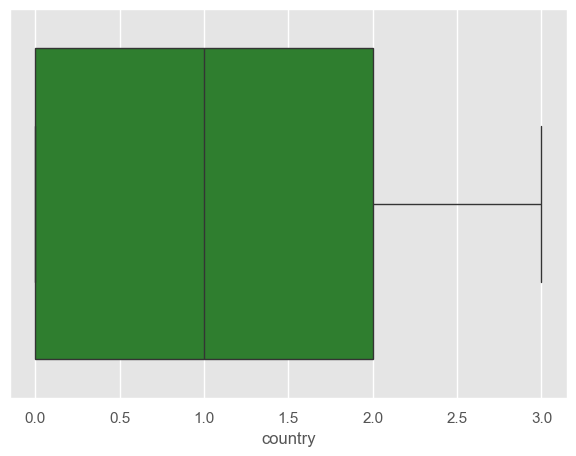

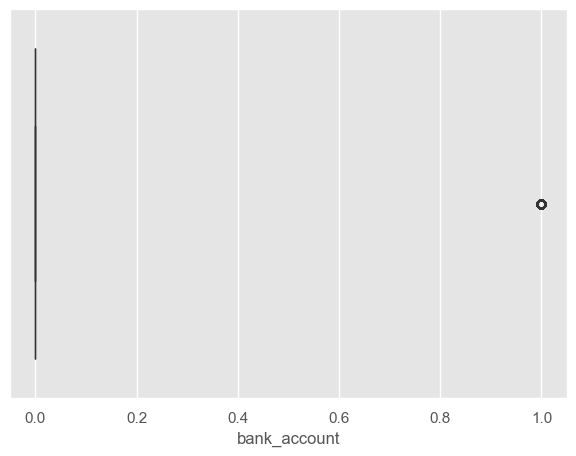

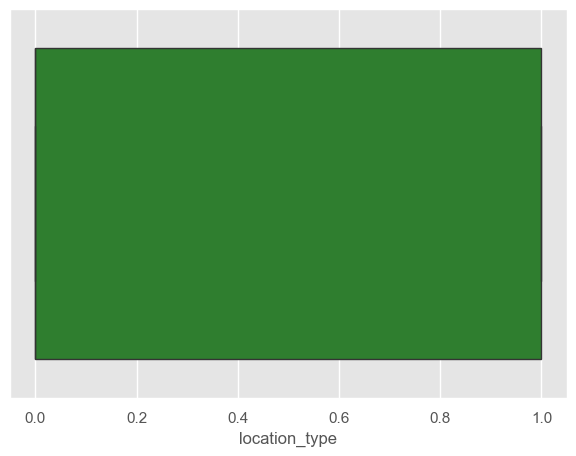

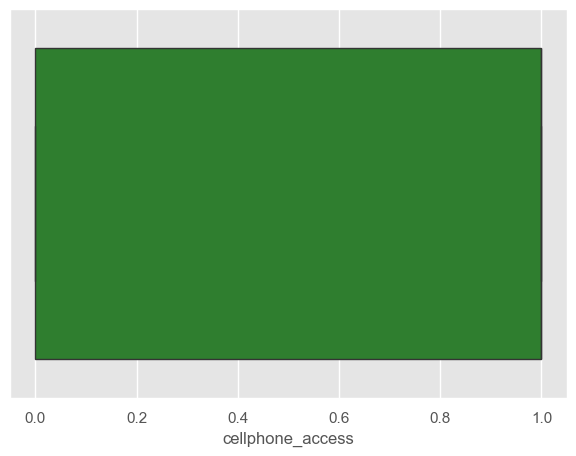

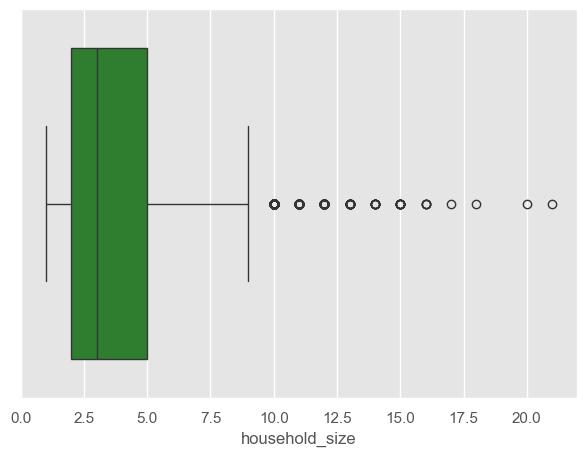

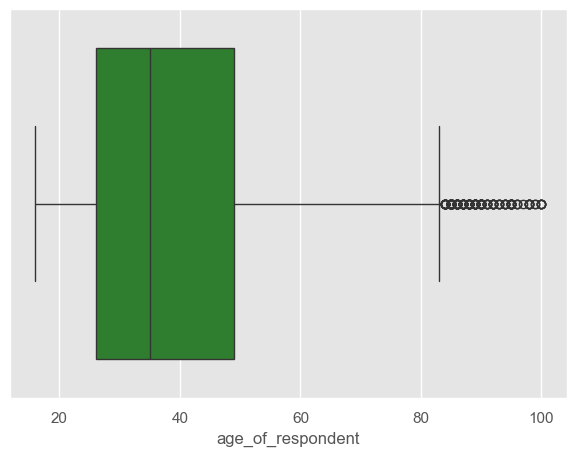

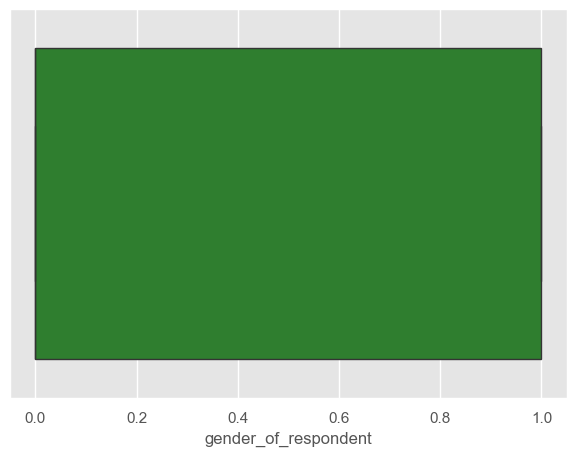

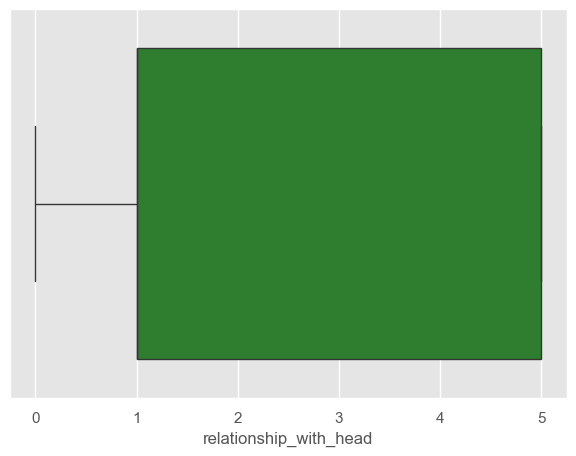

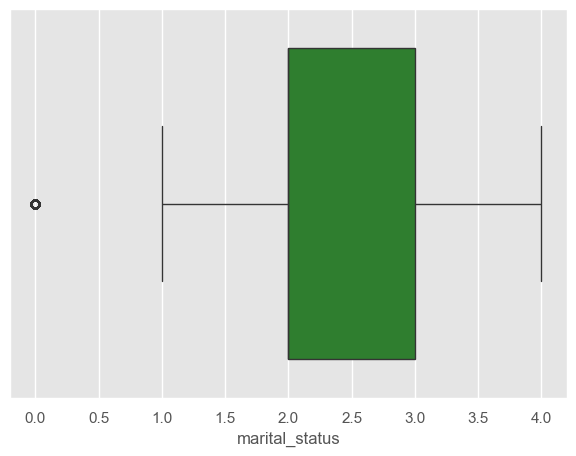

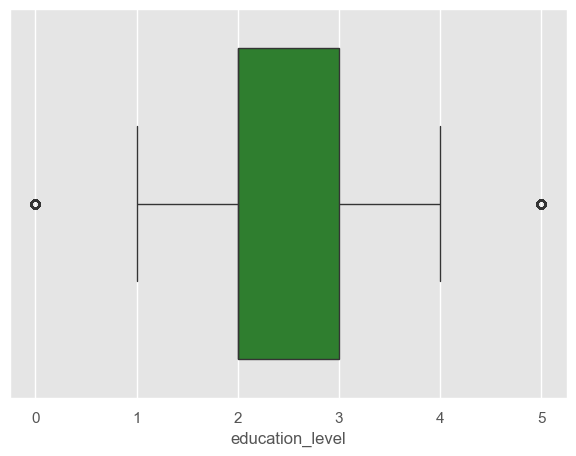

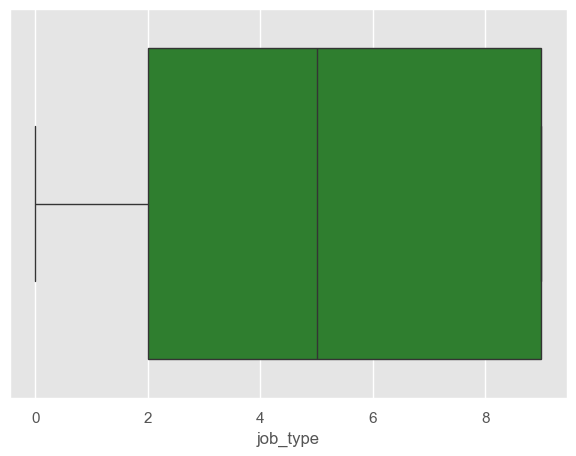

In [17]:
#Creating a box plot for each column 
for cols in df.select_dtypes(include="number").columns:
    sns.boxplot(df, x=cols, color = "ForestGreen")
    plt.show()

### Model Building

In [18]:
#Checking for correlation among the variables 
corr_matrix= df.corr()

In [19]:
corr_table = abs(corr_matrix[["bank_account"]]).sort_values(by = ["bank_account"], ascending= False)

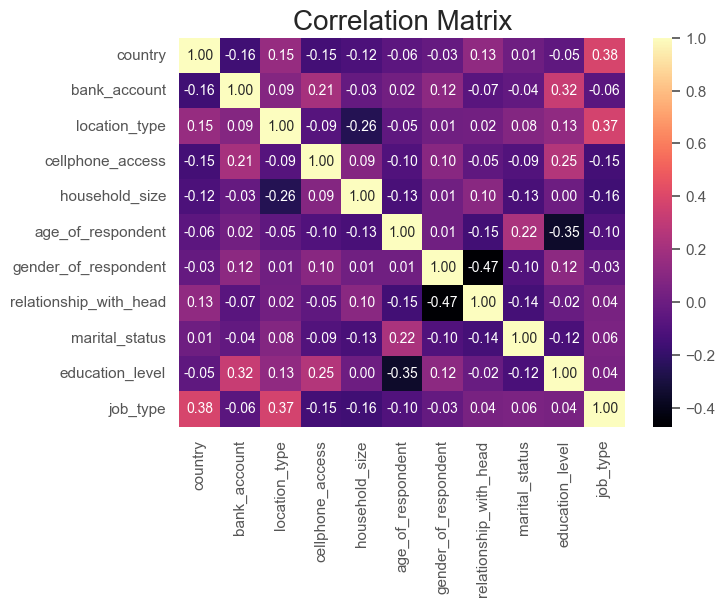

In [20]:
### Visualizing the correlation of each columns 
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="magma")
plt.title("Correlation Matrix",fontsize=20)
plt.show()

In [21]:
corr_table.drop(index = ["bank_account"], inplace= True )

In [22]:
# Checking for the correlation between the dependent variable and independent variables 
corr_table

,bank_account
education_level,0.323768
cellphone_access,0.209669
country,0.161362
gender_of_respondent,0.117234
location_type,0.087288
relationship_with_head,0.070853
job_type,0.064171
marital_status,0.038739
household_size,0.028326
age_of_respondent,0.019429


In [23]:
# Filtering the correlation table in order to drop insignificant variables.
pred_cols = corr_table.loc[corr_table["bank_account"]> 0.05].index

In [24]:
# Getting the list of columns that are significant 
pred_cols

Index(['education_level', 'cellphone_access', 'country',
       'gender_of_respondent', 'location_type', 'relationship_with_head',
       'job_type'],
      dtype='object')

In [25]:
#Defining X and y 

x = df[pred_cols]

y = df["bank_account"]

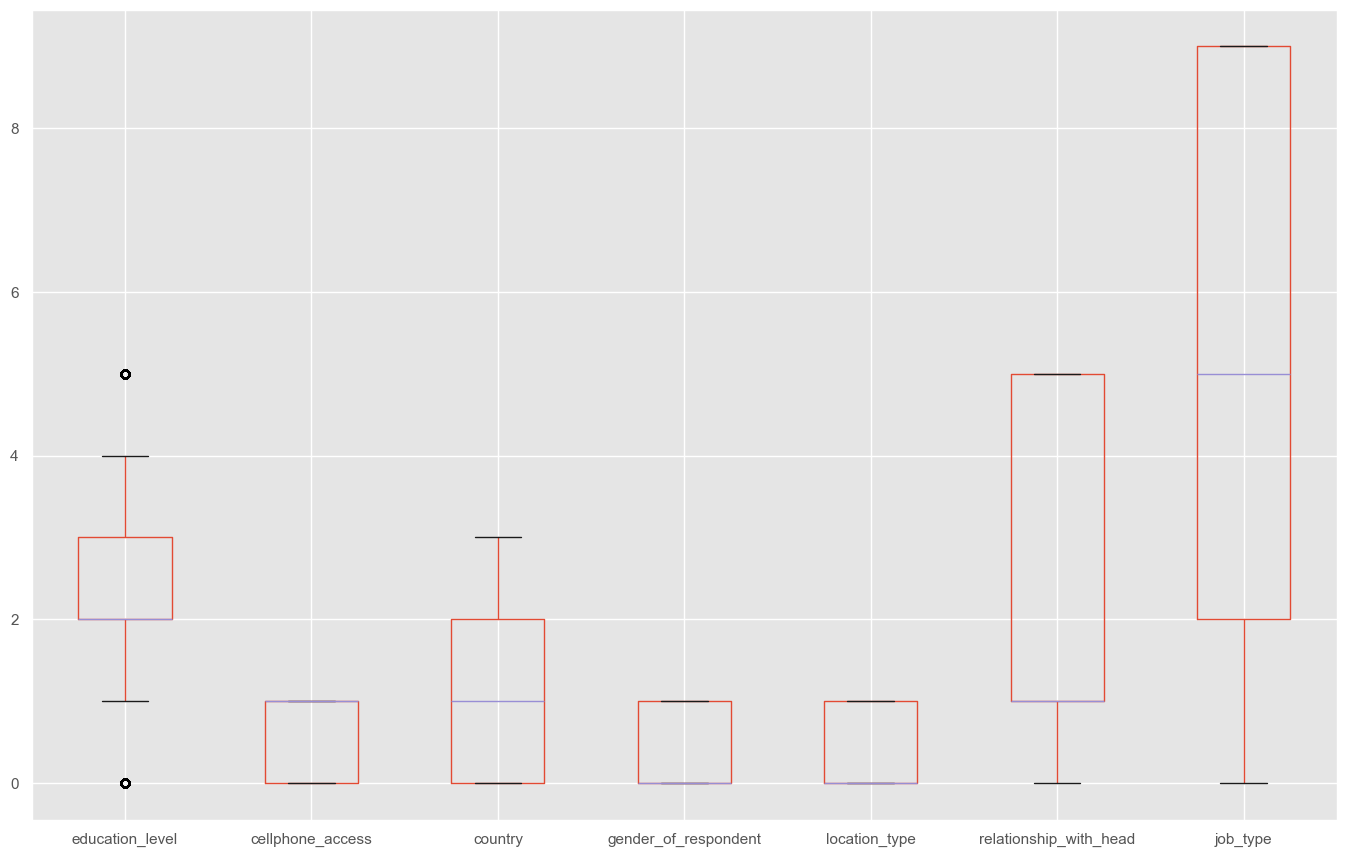

In [26]:
# Checking for outliers 
plt.figure(figsize= (15,10))
x.boxplot()
plt.show()

In [27]:
#Dealing with outliers 
#Import Quantile Transformer 
# from sklearn.preprocessing import QuantileTransformer

# #Initialization 
# scaler = QuantileTransformer()

# x_scaled = scaler.fit_transform(x)

In [28]:
#Importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [29]:
# Using grid search to get the best model 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dec_tree = DecisionTreeClassifier()

In [31]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [32]:
print( "Best HyperParameter : ", grid_search.best_params_)

Best HyperParameter :  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [33]:
y_pred = best_model.predict(X_test)

print ("Classification Report ")
print (classification_report(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6064
           1       0.66      0.34      0.45       994

    accuracy                           0.88      7058
   macro avg       0.78      0.66      0.69      7058
weighted avg       0.87      0.88      0.87      7058



### Random forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5, verbose= 2)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.9s
[CV] END max_depth=3, min_samples_l

In [35]:
y_pred = best_model.predict(X_test)

print ("Classification Report ")
print (classification_report(y_test, y_pred))

Classification Report 
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6064
           1       0.70      0.33      0.45       994

    accuracy                           0.89      7058
   macro avg       0.80      0.65      0.69      7058
weighted avg       0.87      0.89      0.87      7058



In [36]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [41]:
import joblib 

with open("rf_model.pkl", "wb") as file:
  joblib.dump(best_model, file, compress= 5)
  

---

In [38]:
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)